## Team 14
## Ki Bbum Cho
## Xiaocheng Ji
## Steven Simione

# Cancer Classification

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Read the file and convert the data into nympy array.
file = open("COAD.txt", "r")

array = []
c = 0
with open("COAD.txt", "r") as in_file:
    for line in in_file:
        splitted = line.split()
        array.append(splitted)

data = np.array(array)
data.shape

(18043, 501)

In [6]:
# Separate first row and col from data(gene Id, patient ID)
originial_gene_ids = data[1:,0]
original_patient_ids = data[0,1:]
original_values = data[1:,1:]

# creat dataframe
original_df = pd.DataFrame(original_values)
original_df.shape

(18042, 500)

In [7]:
# replace NA values with np.nan
replaced_df = original_df.replace(to_replace="NA", value=np.nan)
replaced_df.shape

(18042, 500)

In [8]:
# drop rows with any nan value
df = replaced_df.dropna(axis=0, how='any')
df.shape

(10820, 500)

In [9]:
# Select randomly 2000 genes and 50 patients

import random

rand_row_indexes = sorted(random.sample(list(np.arange(len(df.index))), 2000))
rand_col_indexes = sorted(random.sample(list(np.arange(len(df.columns))), 50))

sample = df.iloc[rand_row_indexes, rand_col_indexes]
sample.head()

,0,12,23,37,43,54,60,63,64,76,...,400,407,408,414,419,423,447,478,480,494
3,9.59742223054581,9.43201399874257,9.93230349639542,9.36838270308497,9.47947734709486,9.63258086250098,10.2551500485992,9.45040957516797,9.24957736401728,10.7944128607323,...,10.0249390663494,9.89073805384953,10.3393069976442,10.2680873072019,10.1399889546798,9.96728318723738,10.8308865679828,9.91904624524419,10.0209478632296,10.8065586438363
14,10.0138099107707,9.90155660138921,9.85615003628024,9.64385618977473,8.98436234499061,9.30440608484841,10.3039250104682,8.73743056295993,9.88479723014476,8.97959639355963,...,9.91259133804596,11.8869365426342,9.74029094669251,10.183265914922,8.54128638020286,9.78551197299311,9.79523170063115,10.5581088928928,9.84869538631143,11.7417699458283
39,11.0385634829899,9.99964858206368,10.7677143796767,11.2590808369451,10.8792834993462,10.0867486099984,10.1890518678521,10.8183760634665,10.0809398118115,10.2563119030004,...,10.1932968027477,10.2496476370062,9.86619337544366,10.4866580669292,10.4347694672388,10.2883121851523,10.6168111698862,10.4839299189417,10.4073738908527,10.4488935196611
49,7.26010283356395,7.66792546801317,4.89395431264558,6.69271452558108,5.94250043019701,6.46831123842609,9.65423645765043,5.54777986402504,7.06931012336463,3.6285753130583,...,9.26799405810852,6.82338252680012,6.44706338384914,9.24564991258076,5.56184849179764,6.83725073342404,6.53649745542724,5.36884865175846,4.09190289715313,9.33302964024271
65,9.86240660087578,9.33586975897269,9.68432872279408,9.56530147074689,9.90283664276743,9.5243575711271,9.30225118309126,9.77949070514899,9.12154594984696,9.36453872816486,...,8.87484920978846,11.0791057265798,9.4138963468689,9.71940028715603,9.10772291114799,9.95070897935435,9.0167191609156,10.8264058790535,9.91207976319351,9.61520605322562


In [10]:
# using Kmeans clustering, cluster these genes into 20 clusters
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=20).fit(sample)

# get centers
centers = kmeans.cluster_centers_
centers.shape

(20, 50)

In [11]:
# Plot the centers

n_digits: 20, 	 n_samples 2000, 	 n_features 50


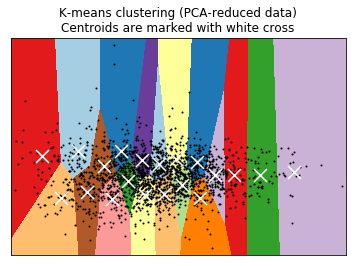

In [12]:
from time import time

from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


n_samples, n_features = sample.shape
n_digits = 20

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


# Below code is from scikitlearn to help us visualize our data.
# #############################################################################
# Visualize the results on PCA-reduced data


reduced_data = PCA(n_components=2).fit_transform(sample)  #Turn the data into a 2d graph.
kmeans = KMeans(n_clusters=n_digits)
kmeans.fit(reduced_data)

# a lower h value increases the effective nice of vector quantization.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary, so we get min and max. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [13]:
# Each X is the average of each cluster. Since we can not display this is 50 dimensions, we changed it to 2,
# which allows us to cluster the data, get the kmean, and display it. Also reducing the dimensions help alievate
# an inflated Euclidean distance value and speed up computation.

In [14]:
# Count the genes in each cluster
label_counts = {}
for l in kmeans.labels_:
    label_counts[l] = label_counts.get(l, 0) + 1

label_counts

{0: 178,
 1: 55,
 2: 132,
 3: 96,
 4: 156,
 5: 142,
 6: 42,
 7: 88,
 8: 35,
 9: 77,
 10: 141,
 11: 44,
 12: 74,
 13: 21,
 14: 114,
 15: 158,
 16: 122,
 17: 139,
 18: 89,
 19: 97}

In [15]:
# Find optimal number of clusters

cluster_range = range( 1, 21 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( sample )
  cluster_errors.append( clusters.inertia_ ) #inertia is the squared mean distance.

In [16]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df

,cluster_errors,num_clusters
0,386817.786349,1
1,193054.758549,2
2,135074.261294,3
3,110856.413217,4
4,97564.532504,5
5,90332.841729,6
6,85600.048298,7
7,82236.596639,8
8,79756.961201,9
9,77249.969864,10


In [17]:
# The cluster error is the squared distance between all the clusters on the kmean graph. Ideally, we would like an
# error closer to zero, which will mean the clusters are really close, but this is what the KMean algorithm 
# found for best fit for 20 clusters.

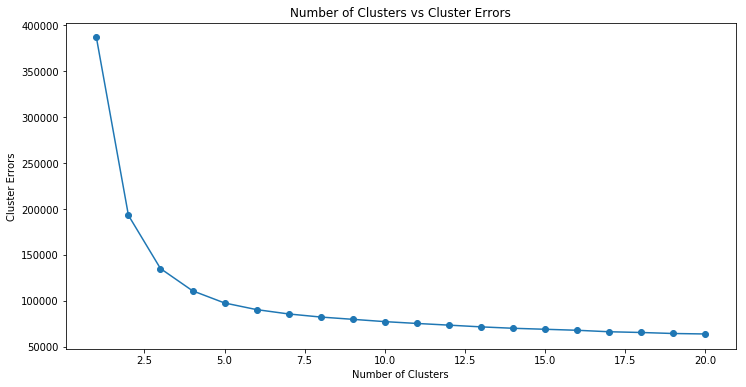

In [18]:
plt.figure(figsize=(12,6))
plt.title('Number of Clusters vs Cluster Errors')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Errors')
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [19]:
# Optimal number of cluster is 6 so we can decrease the number of clusters to this point.
# Evidently there is still more error in six instead of 20, however, 6 is more optimal
# because it has the least amount of error and allows the algorithm to be more efficient, and we would
# like to minimize the amount of clusters as much as possible.

n_digits: 6, 	 n_samples 2000, 	 n_features 50


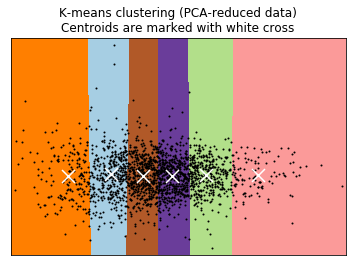

In [21]:
n_samples, n_features = sample.shape
n_digits = 6

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(sample)
kmeans = KMeans(n_clusters=n_digits)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [59]:
# As similar to the above, we are now able to narrow down the clusters into 6 data points and have the most
# similar values.

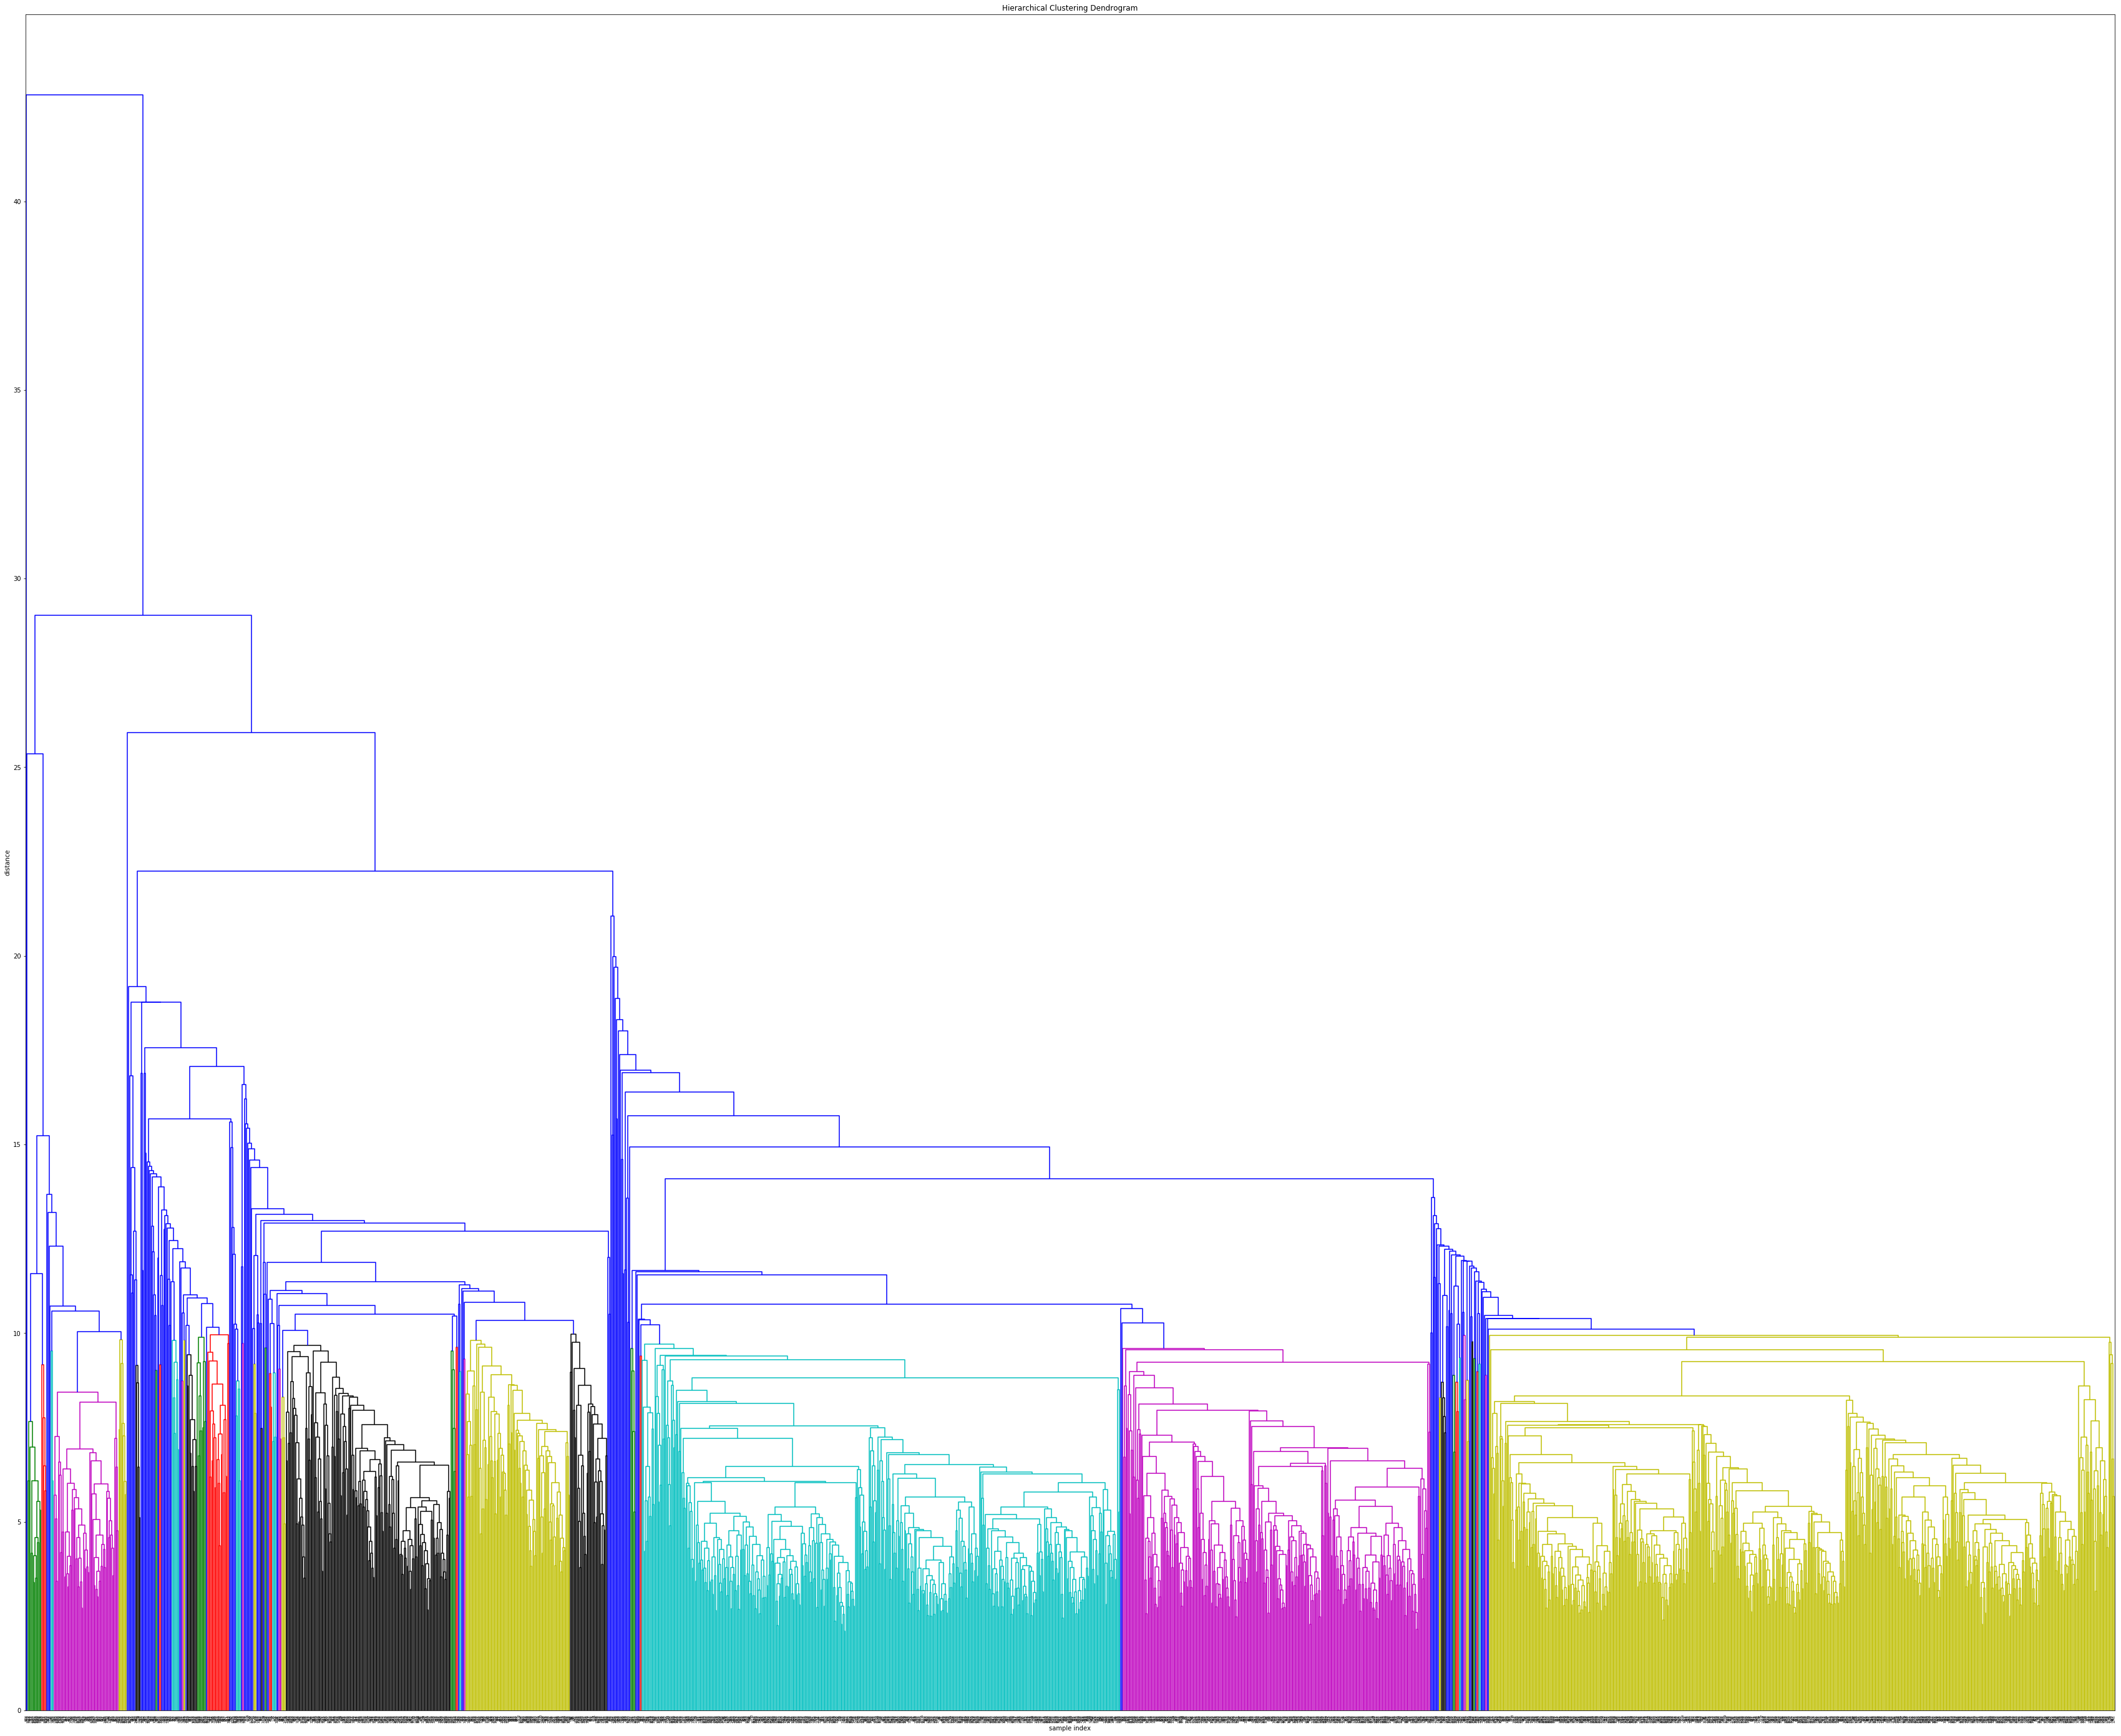

In [52]:
# Perform the hierarchical clustering on patients

from scipy.cluster.hierarchy import dendrogram, linkage


# calculate full dendrogram
plt.figure(figsize=(60, 50))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
tree = linkage(sample,'average')

dendrogram(tree, color_threshold=10)
plt.show()


In [53]:
#6. We chose a threshold of 10 because that seems to be around where the similarity split is apparent for displaying
#the dominant groups. We displayed the values and we decided the 6 obvious groups from left to right are:
#purple, black, yellow, cyan, purple, yellow. The rest are outliers and we are not considering them as dominant.

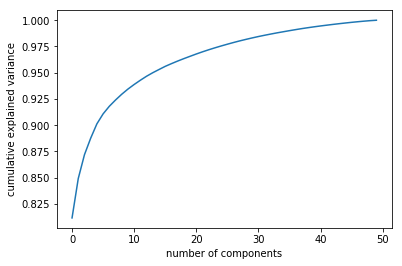

In [18]:
# Perform the PCA analysis on patients. Compute how much of variation is explained by each principle component.

pca = PCA().fit(sample)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

In [19]:
# According to the graph, more than 20 PCs are reasonable.
# When we have 50 components, evidently we will have 100% accuracy with our data.
# However we can still use 20 components and only risk losing 5% accuracy of our data.
# If we do 5, we can still be 90% confident of our data, how ever, it seems the most optimal is 20.